Applied Machine Learning - Project 2

Dimosthenis Plavos-3200156 

# Exploring Why Civil Resistance Works

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Specify the path to your .tab file
file_path = 'NAVCO 1.2 Updated.tab'

## 1. Exploration of Historical Trends

**Create a plot showing the frequency of nonviolent and violent campaigns; the frequency should be counted based on their end years, at decades. The violent and nonviolent campaign counts should be stacked on each other.**

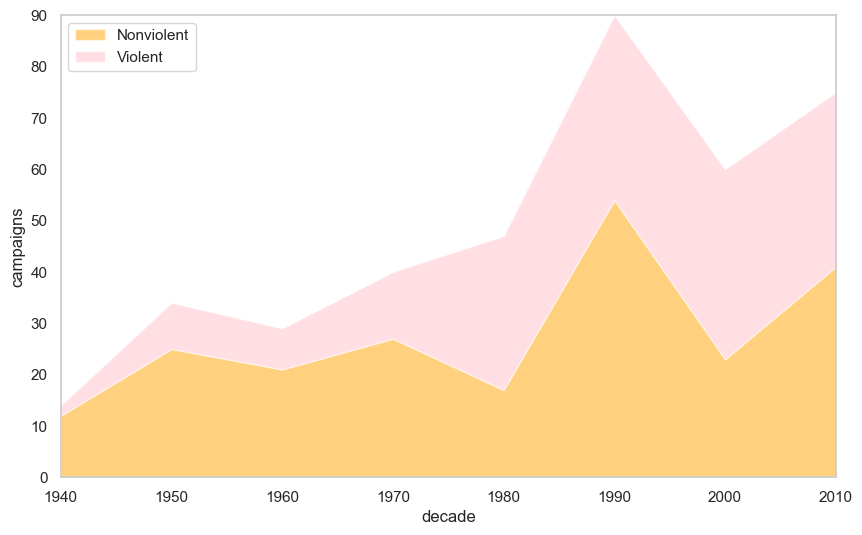

In [2]:
# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Create a new column 'Decade' to categorize the end years into decades
df['Decade'] = (df['EYEAR'] // 10) * 10

# Create a DataFrame with counts for each combination of 'Decade' and 'VIOL'
counts_df = df.groupby(['Decade', 'VIOL']).size().unstack(fill_value=0)

# Convert counts DataFrame to numeric types
counts_df = counts_df.apply(pd.to_numeric)

# Create a stacked area plot using seaborn and matplotlib
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))

# Use stackplot for creating a stacked area plot
plt.stackplot(counts_df.index, counts_df[1], counts_df[0], colors=['orange', 'pink'], alpha=0.5, labels=['Nonviolent', 'Violent'], edgecolor='white', linewidth=1)

# Turn off the grid
plt.grid(False)

# Set plot labels and title
plt.xlabel('decade')
plt.ylabel('campaigns')

# Adjust margins to reduce white space
plt.margins(0, 0)

# Move the legend to the top left
plt.legend(loc='upper left')

# Show the plot
plt.show()

**Create a plot showing, for each decade from 1940 onwards, the number of nonviolent campaigns and the percentage of success. Your plot will have two vertical axes, one for each of the metrics.**

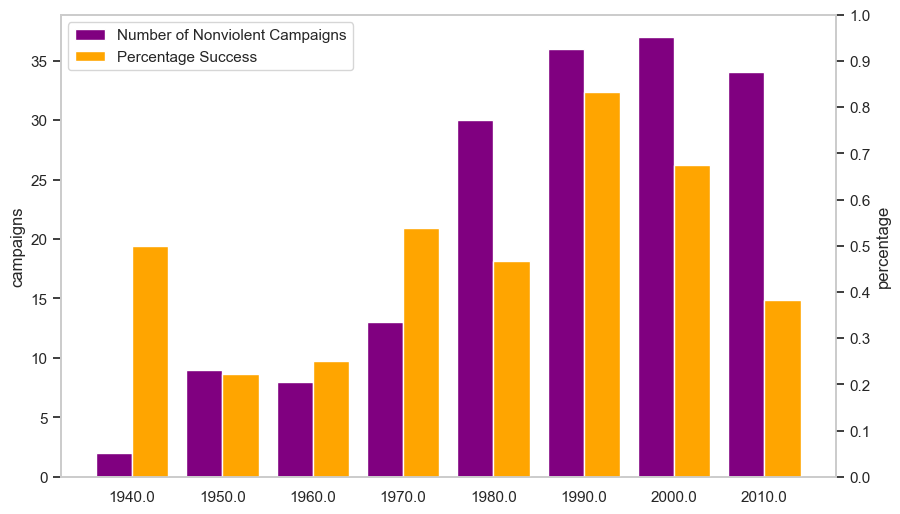

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Create a new column 'Decade' to categorize the end years into decades
df['Decade'] = (df['EYEAR'] // 10) * 10

# Sort DataFrame by 'Decade'
df = df.sort_values(by='Decade')

# Create a new DataFrame for the subset from 1940 onwards
df_subset = df[df['Decade'] >= 1940]

# Calculate the number of nonviolent campaigns for each decade
nonviolent_counts = df_subset.groupby('Decade')['NONVIOL'].sum()

# Calculate the number of successful nonviolent campaigns for each decade
success_nonviolent_counts = df_subset[df_subset['SUCCESS'] == 1.0].groupby('Decade')['NONVIOL'].sum()

# Calculate the percentage of successful nonviolent campaigns compared to the total number of nonviolent campaigns
success_nonviolent_percentage = (success_nonviolent_counts / nonviolent_counts) * 100

# Set the seaborn style to 'whitegrid' to remove grey grid lines
sns.set(style="whitegrid")

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Number of bars
N = len(df_subset['Decade'].unique())

# Width of a bar
bar_width = 0.4

# Position of bars on x-axis
bar_positions = range(N)

# Bar plot for number of nonviolent campaigns on the left side
ax.bar([pos - bar_width/2 for pos in bar_positions], nonviolent_counts, bar_width, color='purple', label='Number of Nonviolent Campaigns')

# Bar plot for percentage of successful nonviolent campaigns on the right side
ax2 = ax.twinx()
ax2.bar([pos + bar_width/2 for pos in bar_positions], success_nonviolent_percentage, bar_width, color='orange', label='Percentage Success')

# Set labels and title
ax.set(ylabel='campaigns')
ax2.set(ylabel='percentage')

# xticks
plt.xticks(bar_positions, df_subset['Decade'].unique())

# Set y-axis ticks and labels for the right-side axis
ax2.set_yticks(range(0, 101, 10))
ax2.set_yticklabels([f'{i/100}' for i in range(0, 101, 10)])

# Turn off the grid
ax.grid(False)
ax2.grid(False)

# Get handles and labels from both axes
handles, labels = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Combine handles and labels
all_handles = handles + handles2
all_labels = labels + labels2

# Show the combined legend in the upper left corner
ax.legend(all_handles, all_labels, loc='upper left')

# Show the plot
plt.show()

**Create a plot showing the success rate for violent and nonviolent campaigns by decade.**

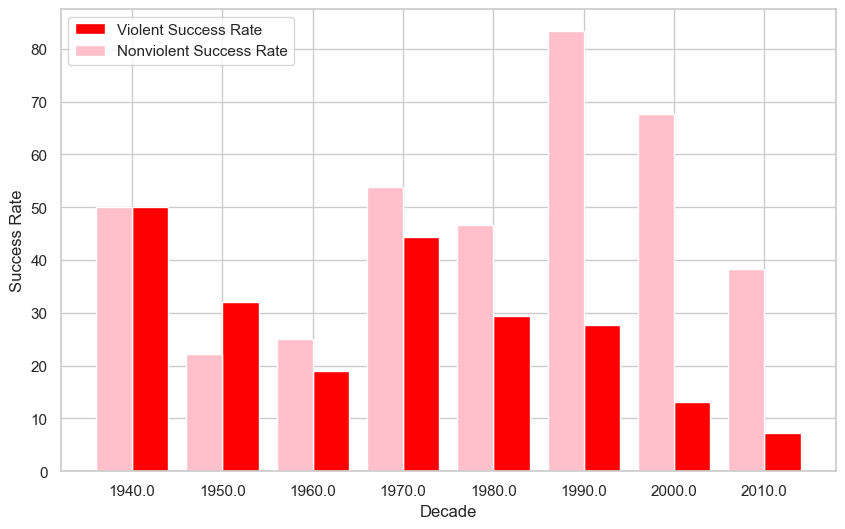

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Create a new column 'Decade' to categorize the end years into decades
df['Decade'] = (df['EYEAR'] // 10) * 10

# Assuming you have a DataFrame df with columns 'Decade', 'VIOL', 'SUCCESS'
# Filter data from 1940 onwards
df = df[df['Decade'] >= 1940]

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Calculate success rates for violent and nonviolent campaigns by decade
violent_success_rate_by_decade = df[df['VIOL'] == 1.0].groupby('Decade')['SUCCESS'].mean() * 100
nonviolent_success_rate_by_decade = df[df['VIOL'] == 0.0].groupby('Decade')['SUCCESS'].mean() * 100

# Bar plot for success rate by decade for violent and nonviolent campaigns
bar_width = 0.4
bar_positions = range(len(violent_success_rate_by_decade))

ax.bar([pos + bar_width/2 for pos in bar_positions], violent_success_rate_by_decade.values, bar_width, color='red', label='Violent Success Rate')
ax.bar([pos - bar_width/2 for pos in bar_positions], nonviolent_success_rate_by_decade.values, bar_width, color='pink', label='Nonviolent Success Rate')

# Set labels and title
ax.set(ylabel='Success Rate', xlabel='Decade')

# Set xticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(violent_success_rate_by_decade.index)

# Show the legend
plt.legend(loc='upper left')

# Show the plot
plt.show()

## 2. Largest Resistance Campaigns, 1946-2014

**Create a horizontal bar plot with the resistance campaigns, for all years, with a percentage of participation at least 2.0%.**

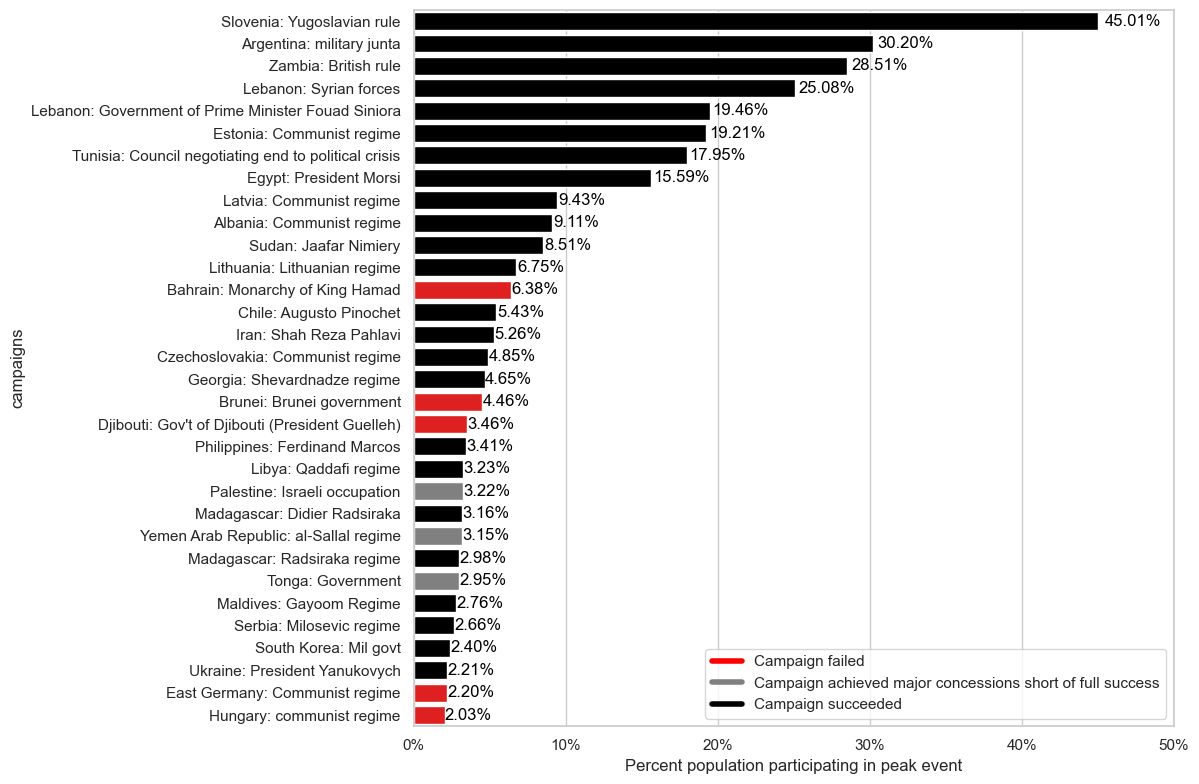

In [5]:


# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Filter resistance campaigns with a percentage of participation at least 2.0%
resistance_df = df[(df['PERCENTAGEPOPULARPARTICIPATION'] >= 0.02)]

# Drop rows with NaN or null values in 'PERCENTAGEPOPULARPARTICIPATION'
resistance_df = resistance_df.dropna(subset=['PERCENTAGEPOPULARPARTICIPATION'])

# Remove infinite values
resistance_df = resistance_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['PERCENTAGEPOPULARPARTICIPATION'])

# Set a larger figure size
plt.figure(figsize=(12, 8))  # Adjust the width and height according to your preference

# Create a new column with the concatenated result of 'LOCATION' and 'TARGET'
resistance_df['Location_Target'] = resistance_df['LOCATION'].astype(str) + ': ' + resistance_df['TARGET'].astype(str)

# Convert 'Location_Target' to a categorical data type with the order specified by sorting
location_target_order = resistance_df.sort_values(by='PERCENTAGEPOPULARPARTICIPATION', ascending=False)['Location_Target']
resistance_df['Location_Target'] = pd.Categorical(resistance_df['Location_Target'], categories=location_target_order, ordered=True)

# Create a horizontal bar plot without hue for campaigns with LIMITED=1.0
limited_df = resistance_df[resistance_df['LIMITED'] == 1.0]
limited_bar_plot = sns.barplot(x='PERCENTAGEPOPULARPARTICIPATION', y='Location_Target', data=limited_df, color='grey', dodge=False)

# Create a horizontal bar plot with hue for campaigns with LIMITED!=1.0
non_limited_df = resistance_df[resistance_df['LIMITED'] != 1.0]
bar_plot = sns.barplot(x='PERCENTAGEPOPULARPARTICIPATION', y='Location_Target', data=non_limited_df, hue='SUCCESS', palette={0.0: 'red', 1.0: 'black'}, dodge=False)

# Customize legend
legend_labels = {'red': 'Campaign failed', 'grey': 'Campaign achieved major concessions short of full success', 'black': 'Campaign succeeded'}
plt.legend(labels=legend_labels.values(), handles=[plt.Line2D([0], [0], color=color, lw=4) for color in legend_labels.keys()], loc='lower right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Rotate y-axis labels to ensure full visibility
plt.yticks(rotation=0, ha='right')  # 'ha' stands for horizontal alignment

# Customize x-axis tick labels
x_ticks_percent = [f'{int(x * 100)}%' for x in plt.xticks()[0]]
plt.xticks(plt.xticks()[0], labels=x_ticks_percent)

# Show the number of the percentage on the right side of the bars
for rect in bar_plot.patches:
    # Get the percentage value
    percentage = rect.get_width()

    # Check if the percentage is finite
    if np.isfinite(percentage):
        # Display the percentage on the right side of the bar, before the end
        plt.text(percentage * 1.01, rect.get_y() + rect.get_height() / 2, f'{percentage:.2%}', ha='left', va='center', color='black')

# Set plot labels and title
plt.xlabel('Percent population participating in peak event')
plt.ylabel('campaigns')

# Show the plot
plt.show()

In [6]:
# Filter rows where 'LOCATION' contains 'Greece'
greece_data = df[df['LOCATION'].str.contains('Greece', case=False, na=False)]

# Display all columns for the filtered data
print(greece_data)

     NAVCOID             CAMPAIGN LOCATION   BYEAR   EYEAR  \
119    401.0      Greek Civil War   Greece  1946.0  1949.0   
120     89.0  Greek anti-military   Greece  1973.0  1974.0   

                        TARGET  SUCCESS  LIMITED  FAILURE  ONGOING  ...  \
119  British and US occupation      0.0      0.0      1.0      0.0  ...   
120              Military rule      1.0      0.0      0.0      0.0  ...   

     OTHER  DURATION  PARTICIPATION  PERCENTAGEPOPULARPARTICIPATION  REGVIOL  \
119    0.0    1778.0        40000.0                        0.005092      1.0   
120    0.0     654.0         2500.0                        0.000279      1.0   

     DEFECT  VIOLENTFLANK  VIOLSIM  REGAID  STATESUP  
119     0.0           NaN      0.0     1.0       1.0  
120     1.0           1.0      0.0     1.0       0.0  

[2 rows x 25 columns]



**Conclusions about Greece:**

**Greek Civil War (1946-1949):**

The campaign lasted for 1778 days.
The campaign targeted the "British and US occupation."
The outcome was failure (SUCCESS = 0.0), indicating that the campaign did not achieve its objectives.
The participation was relatively high, with 40,000 individuals involved, and the percentage of popular participation was 0.005092.

**Greek Anti-Military Campaign (1973-1974):**

The campaign lasted for 654 days.
The target was "Military rule."
The outcome was success (SUCCESS = 1.0), indicating that the campaign achieved its objectives.
The participation was lower compared to the Greek Civil War, with 2500 individuals involved, and the percentage of popular participation was 0.000279.
There was an occurrence of defection (DEFECT = 1.0), suggesting a faction within the campaign may have split or separated.

## 3. The Effect of Participation on the Probability of Campaign Success

**Examine the effect of participation on the probability of campaign success. You should run a logistic regression for success on membership per capita, controlling for the location’s logged population the year the campaign ends. Explain your results.**

**Having done that, create a scatter plot showing the logged participants per capita, on the $x$ axis, and the probability of success, on the $y$ axis.**

Optimization terminated successfully.
         Current function value: 0.580756
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      377
Method:                           MLE   Df Model:                            2
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.1297
Time:                        17:21:01   Log-Likelihood:                -220.69
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 5.189e-15
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -2.8142      1.496     -1.881      0.060      -5.746       0.118
Memb_per_capit

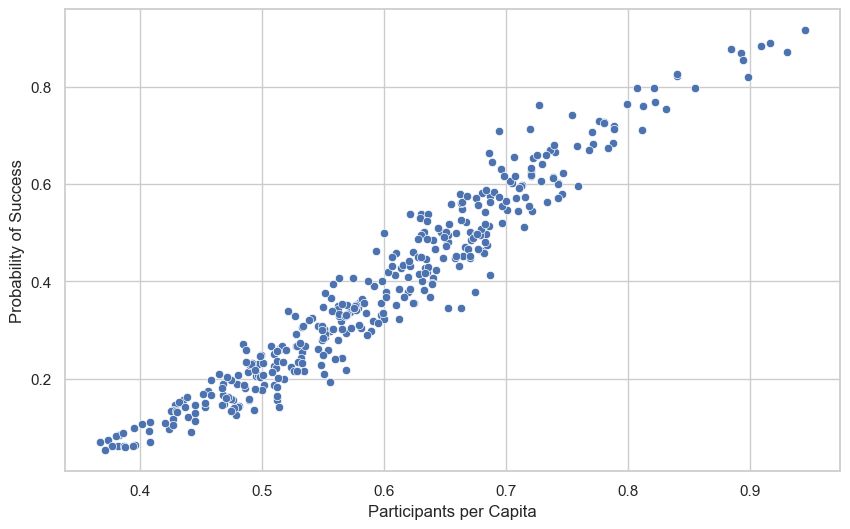

In [7]:
# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Filter out NaN values from 'PARTICIPATION' column
filtered_df1 = df.dropna(subset=['PARTICIPATION'])

# Create a new DataFrame with 'PARTICIPATION' column
new_df1 = pd.DataFrame({'PARTICIPATION': filtered_df1['PARTICIPATION']})

# Create 'LOG_PART' column with log-transformed values
new_df1['LOG_PART'] = np.log(new_df1['PARTICIPATION'])

# Add 'PERCENTAGEPOPULARPARTICIPATION' column from the original DataFrame
new_df1['PERCENTAGEPOPULARPARTICIPATION'] = filtered_df1['PERCENTAGEPOPULARPARTICIPATION']

# Adjust 'POPULATION' column calculation to avoid division by extremely small values
new_df1['POPULATION'] = new_df1['PARTICIPATION'] / (new_df1['PERCENTAGEPOPULARPARTICIPATION'] + 1e-10)

# Add 'LOG_POPULATION' column with log-transformed values of 'POPULATION'
new_df1['LOG_POPULATION'] = np.log(new_df1['POPULATION'])

# Add 'Memb_per_capita' column
new_df1['Memb_per_capita'] = new_df1['LOG_PART'] / new_df1['LOG_POPULATION']

# Add 'SUCCESS' column from the original DataFrame
new_df1['SUCCESS'] = filtered_df1['SUCCESS']

# Fit logistic regression model
logit_mod1 = logit("SUCCESS ~ Memb_per_capita + LOG_POPULATION", data=new_df1)
logit_res1 = logit_mod1.fit()

# Get predicted probabilities
new_df1['Prediction'] = logit_res1.predict(new_df1[['Memb_per_capita', 'LOG_POPULATION']])

# Print the summary of logistic regression results
print(logit_res1.summary())

# Create a scatter plot with the original data points and predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Memb_per_capita', y='Prediction', data=new_df1, marker='o', label='Predictions', legend=False)

# Turn on the grid
plt.grid(True)

# Set plot labels and title
plt.xlabel('Participants per Capita')
plt.ylabel('Probability of Success')

# Show the plot
plt.show()

**Explanation of when using 2 variables**

With a p-value of 5.189e-15, which is extremely close to zero, it strongly suggests that the model is statistically significant in predicting the outcome. This means that at least one of the predictors is influencing the likelihood of success.

The positive coefficient (7.6475) for Memb_per_capita implies that an increase in Memb_per_capita is associated with an increase in the log-odds of success. The p-value (0.000) is highly significant, suggesting that Memb_per_capita is a strong predictor of success.

On the other side, the negative coefficient (-0.1388) for LOG_POPULATION implies that an increase in LOG_POPULATION is associated with a decrease in the log-odds of success. The p-value (0.059) is slightly above 0.05, indicating a borderline significance.

When plotting, we can see that the algorithm is good at predicting the outcome, but not identical. The data are gathered and follow an intuitive line but they are kind of stretched.

**Then, do the same but with only the membership per capita as independent variable (explain why is this different than the previous one).**

Optimization terminated successfully.
         Current function value: 0.585556
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                SUCCESS   No. Observations:                  380
Model:                          Logit   Df Residuals:                      378
Method:                           MLE   Df Model:                            1
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.1225
Time:                        17:21:01   Log-Likelihood:                -222.51
converged:                       True   LL-Null:                       -253.58
Covariance Type:            nonrobust   LLR p-value:                 3.204e-15
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -5.3469      0.709     -7.536      0.000      -6.737      -3.956
Memb_per_capit

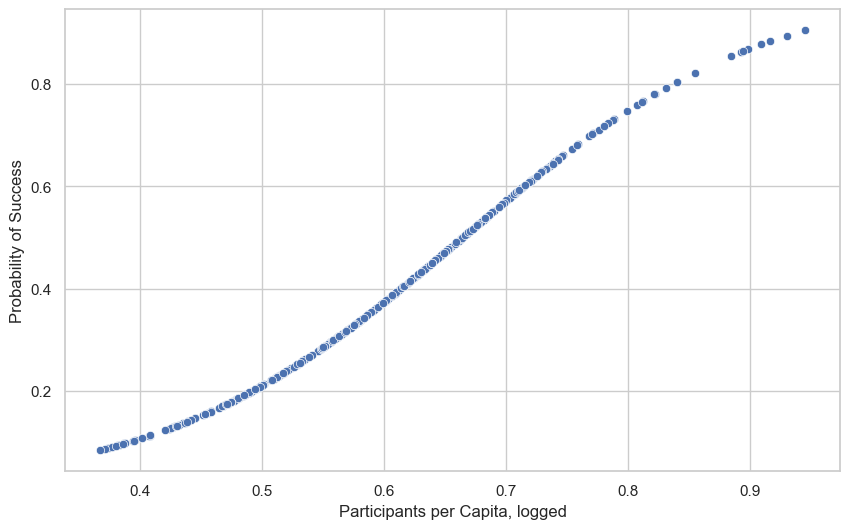

In [8]:

# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Filter out NaN values from 'PARTICIPATION' column
filtered_df2 = df.dropna(subset=['PARTICIPATION'])

# Create a new DataFrame with 'PARTICIPATION' column
new_df2 = pd.DataFrame({'PARTICIPATION': filtered_df2['PARTICIPATION']})

# Create 'LOG_PART' column with log-transformed values
new_df2['LOG_PART'] = np.log(new_df2['PARTICIPATION'])

# Add 'PERCENTAGEPOPULARPARTICIPATION' column from the original DataFrame
new_df2['PERCENTAGEPOPULARPARTICIPATION'] = filtered_df2['PERCENTAGEPOPULARPARTICIPATION']

# Adjust 'POPULATION' column calculation to avoid division by extremely small values
new_df2['POPULATION'] = new_df2['PARTICIPATION'] / (new_df2['PERCENTAGEPOPULARPARTICIPATION'] + 1e-10)

# Add 'LOG_POPULATION' column with log-transformed values of 'POPULATION'
new_df2['LOG_POPULATION'] = np.log(new_df2['POPULATION'])

# Add 'Memb_per_capita' column
new_df2['Memb_per_capita'] = new_df2['LOG_PART'] / new_df2['LOG_POPULATION']

# Add 'SUCCESS' column from the original DataFrame
new_df2['SUCCESS'] = filtered_df2['SUCCESS']

# Fit logistic regression model
logit_mod2 = logit("SUCCESS ~ Memb_per_capita", data=new_df2)
logit_res2 = logit_mod2.fit()

# Get predicted probabilities
new_df2['Prediction2'] = logit_res2.predict(new_df2[['Memb_per_capita']])

# Print the summary of logistic regression results
print(logit_res2.summary())

# Create a scatter plot with the original data points and predictions
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Memb_per_capita', y='Prediction2', data=new_df2, marker='o', label='Predictions', legend = False)

# Set plot labels and title
plt.xlabel('Participants per Capita, logged')
plt.ylabel('Probability of Success')

# Turn on the grid
plt.grid(True)

# Show the plot
plt.show()

**Explanation of when using 1 independent variable:**

The likelihood ratio test (LLR) p-value is extremely small (3.204e-15), indicating that the model, including the intercept and Memb_per_capita, is statistically significant. This means that Memb_per_capita alone is influencing the likelihood of success.

Also, The positive coefficient (8.0495) for Memb_per_capita implies that an increase in Memb_per_capita is associated with an increase in the log-odds of success. The p-value (0.000) is highly significant, indicating that Memb_per_capita is a strong predictor of success.

If we compare the 2 models, we can see that the logistic regression results with one independent variable (Memb_per_capita) show that the model is highly significant, and Memb_per_capita is a strong predictor of the success outcome. This is what we can see when plotting with the second algorithm. What comes off seems like a better predictor. The data give an intuition of a line, and seem to be really gathered. 

## 4. The Level of Participation Tipping Point

**As we mentioned above, a famous output of the research is the 3.5% rule regarding the population participation in a campaign and the probability of success.**

**Based on your data, create a table and explain how Chenoweth came up with the rule.**

In [9]:
from tabulate import tabulate

# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')

# Drop rows with NaN values in 'PERCENTAGEPOPULARPARTICIPATION' or 'SUCCESS'
df = df.dropna(subset=['PERCENTAGEPOPULARPARTICIPATION'])

# Define the bins for PERCENTAGEPOPULARPARTICIPATION
bins = [0, 0.000035, 0.00015, 0.0006, 0.0025, 0.01, 0.035, float('inf')]
labels = [
    'less than 0.0035%',
    '0.0035% - 0.015%',
    '0.015% - 0.06%',
    '0.06% - 0.25%',
    '0.25% - 1.0%',
    '1.0% - 3.5%',
    'greater than 3.5%'
]

# Create a new column 'Peak Popular Participation (%)' with the specified bins
df['Peak Popular Participation (%)'] = pd.cut(df['PERCENTAGEPOPULARPARTICIPATION'], bins=bins, labels=labels, include_lowest=False)

# Group by the new column and calculate the count and success rate
result_df = df.groupby('Peak Popular Participation (%)').agg(
    Observations=('PERCENTAGEPOPULARPARTICIPATION', 'count'),
    Success_Rate=('SUCCESS', 'mean')
).reset_index()

# Rename columns for clarity
result_df.rename(columns={'PERCENTAGEPOPULARPARTICIPATION': 'Observations'}, inplace=True)

# Format 'Success_Rate' as percentages
result_df['Success_Rate'] = (result_df['Success_Rate'] * 100).map('{:.2f}%'.format)

# Sort the DataFrame in descending order based on 'Peak Popular Participation (%)'
result_df = result_df.sort_values(by='Peak Popular Participation (%)', ascending=False)

# Convert DataFrame to tabular format
table = tabulate(result_df, headers='keys', tablefmt='grid', showindex=False)

# Display the tabular format
print(table)

+----------------------------------+----------------+----------------+
| Peak Popular Participation (%)   |   Observations | Success_Rate   |
+==================================+================+================+
| greater than 3.5%                |             18 | 88.89%         |
+----------------------------------+----------------+----------------+
| 1.0% - 3.5%                      |             41 | 60.98%         |
+----------------------------------+----------------+----------------+
| 0.25% - 1.0%                     |             92 | 45.65%         |
+----------------------------------+----------------+----------------+
| 0.06% - 0.25%                    |             95 | 45.26%         |
+----------------------------------+----------------+----------------+
| 0.015% - 0.06%                   |             66 | 24.24%         |
+----------------------------------+----------------+----------------+
| 0.0035% - 0.015%                 |             44 | 9.09%          |
+-----

**Explanation:**

Research by Erica Chenoweth shows that when approximately 3.5% of a population actively participates in sustained nonviolent resistance, it very likely that they succeed in achieving their goals. The rule of 3,5% is more of a  helpful observation rather than a strict formula. 

**Apart from the way Chenoweth came up with the rule, we can derive it in more statistically-based way.  From the results you obtained in the previous question, find the percentage of the population that is the tipping point for success in a campaign with 99% probability.**

In [10]:
# Define a range of 'Memb_per_capita' values
memb_per_capita_values = np.linspace(new_df2['Memb_per_capita'].min(), new_df2['Memb_per_capita'].max(), 1000)

# Create a DataFrame with the 'Memb_per_capita' values
prediction_df2 = pd.DataFrame({'Memb_per_capita': memb_per_capita_values})

# Use the logistic regression model to predict success probabilities for the range of 'Memb_per_capita' values
predicted_probabilities2 = logit_res2.predict(prediction_df2[['Memb_per_capita']])

# Find the index where the predicted probability is closest 0.99 
closest_index2 = np.argmin(np.abs(predicted_probabilities2 - 0.99))

# Get the corresponding 'Memb_per_capita' value
closest_memb_per_capita2 = memb_per_capita_values[closest_index2]

# Display the tipping point
print(f'Tipping Point for Probability closest to 0.99: {closest_memb_per_capita2:.4f}')

Tipping Point for Probability closest to 0.99: 0.9450


## 5. Nonviolent Resistance and Target Regime Type

**Examine whether nonviolent resistance remains significant even if we control for the regime type. Run a logistic   regression of success on the nonviolence indicator controlling for the Polity V score of campaign target, the log of participation, and the location’s logged population the year the campaign ends.**

In [11]:
# Read the tab-delimited file into a Pandas DataFrame
df = pd.read_csv(file_path, delimiter='\t')
# Specify the path to your Excel file
xls_file_path = 'p5v2018.xls'

# Read the Excel file into a Pandas DataFrame
xls = pd.read_excel(xls_file_path)

# Filter out NaN values from 'PARTICIPATION' column
filtered_df5 = df.dropna(subset=['PARTICIPATION'])

# Create a new DataFrame with 'PARTICIPATION' column
new_df5 = pd.DataFrame({'PARTICIPATION': filtered_df5['PARTICIPATION']})

# Create 'LOG_PART' column with log-transformed values
new_df5['LOG_PART'] = np.log(new_df5['PARTICIPATION'])

# Add 'PERCENTAGEPOPULARPARTICIPATION' column from the original DataFrame
new_df5['PERCENTAGEPOPULARPARTICIPATION'] = filtered_df5['PERCENTAGEPOPULARPARTICIPATION']

# Adjust 'POPULATION' column calculation to avoid division by extremely small values
new_df5['POPULATION'] = new_df5['PARTICIPATION'] / (new_df5['PERCENTAGEPOPULARPARTICIPATION'] + 1e-10)

# Add 'LOG_POPULATION' column with log-transformed values of 'POPULATION'
new_df5['LOG_POPULATION'] = np.log(new_df5['POPULATION'])

# Add 'Memb_per_capita' column
new_df5['Memb_per_capita'] = new_df5['LOG_PART'] / new_df5['LOG_POPULATION']

# Add 'SUCCESS' column from the original DataFrame
new_df5['SUCCESS'] = filtered_df5['SUCCESS']

# Add 'NONVIOL', and 'EYEAR' columns from the original DataFrame
new_df5['NONVIOL'] = filtered_df5['NONVIOL']
new_df5['EYEAR'] = filtered_df5['EYEAR']
new_df5['LOCATION'] = filtered_df5['LOCATION']

# Adjust the case of column names in new_df
new_df5.rename(columns={'LOCATION': 'country', 'EYEAR': 'year'}, inplace=True)

# Specify the common columns for merging
common_columns = ['country', 'year']

# Merge 'NONVIOL' with 'polity' using left merge
polity_v = pd.merge(new_df5[['country', 'year', 'NONVIOL']], xls[['country', 'year', 'polity']], how='left', on=common_columns)

# Add 'LOG_POPULATION' and 'LOG_PART' columns from the new_df DataFrame
polity_v = pd.merge(polity_v, new_df5[['country', 'year', 'LOG_POPULATION', 'LOG_PART' , 'SUCCESS']], how='left', on=common_columns)

# Fit logistic regression model
logit_mod5 = logit("SUCCESS ~ NONVIOL + LOG_POPULATION + LOG_PART + polity", data=polity_v)
logit_res5 = logit_mod5.fit()

# Get predicted probabilities
polity_v['Prediction'] = logit_res5.predict(polity_v[['NONVIOL', 'LOG_POPULATION', 'LOG_PART', 'polity']])

logit_res5.summary()

Optimization terminated successfully.
         Current function value: 0.502643
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                SUCCESS   No. Observations:                  375
Model:                          Logit   Df Residuals:                      370
Method:                           MLE   Df Model:                            4
Date:                Thu, 04 Apr 2024   Pseudo R-squ.:                  0.2232
Time:                        17:21:02   Log-Likelihood:                -188.49
converged:                       True   LL-Null:                       -242.64
Covariance Type:            nonrobust   LLR p-value:                 1.683e-22
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.1237      1.397      1.520      0.128      -0.614       4.861
NONVIOL            0.9033      0.262      3.444      0.001       0.389       1.417
LOG_POPULATION    -0.4588      0.090     -5.091      0.000      -0.635      -0.282
LOG_PART           0.4403      0.078      5.617      0.000       0.287       0.594
polity            -0.0068      0.004     -1.884      0.060      -0.014       0.000
==================================================================================
"""